## IBM Keras - FInal Assignment

In [67]:
import pandas as pd
import numpy as np
import keras
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('concrete_data.csv')

In [6]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [8]:
df.shape

(1030, 9)

In [9]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [11]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


The data looks clean, with no null values. We have to predict data of concrete strength



In [13]:
X = df[df.columns[df.columns != 'Strength']]

In [17]:
y = df['Strength']

### Import Keras Models

In [20]:
from keras.models import Sequential
from keras.layers import Dense

### Part A - Build Baseline Model

In [30]:
#Create Neural Network

def regression_model():
    #create model
    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(1))
    
    #compile the model
    model.compile(optimizer='adam', loss ='mean_squared_error')
    return(model)

### Split the data

Since the data is clean we can go ahead and split the data in train and test dataset.

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [40]:
n_cols = X_train.shape[1]
n_cols

8

In [41]:
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (721, 8)
y_train: (721,)
X_test: (309, 8)
y_test: (309,)


In [42]:
#build the model
model = regression_model()

In [43]:
#fit the model

model.fit(X_train, y_train, validation_split=0.2, epochs=50)

Train on 576 samples, validate on 145 samples
Epoch 1/50
576/576 [==============================] - 1s 1ms/step - loss: 30879.2972 - val_loss: 19858.0317
Epoch 2/50
576/576 [==============================] - 0s 85us/step - loss: 13139.6482 - val_loss: 8294.0097
Epoch 3/50
576/576 [==============================] - 0s 83us/step - loss: 5699.5101 - val_loss: 4145.7313
Epoch 4/50
576/576 [==============================] - 0s 95us/step - loss: 3383.6093 - val_loss: 3113.4729
Epoch 5/50
576/576 [==============================] - 0s 86us/step - loss: 2899.6730 - val_loss: 2916.6057
Epoch 6/50
576/576 [==============================] - 0s 82us/step - loss: 2753.7333 - val_loss: 2808.1071
Epoch 7/50
576/576 [==============================] - 0s 80us/step - loss: 2639.1568 - val_loss: 2696.7693
Epoch 8/50
576/576 [==============================] - 0s 84us/step - loss: 2524.3170 - val_loss: 2591.5136
Epoch 9/50
576/576 [==============================] - 0s 82us/step - loss: 2414.1969 - val_loss:

In [44]:
#Prediction on test data

predict_yhat = model.predict(X_test)

In [38]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predict_yhat)
mse

274.17703075133716

In [61]:
mse_total = []

for i in range(50):
    
    print('\nIteration:', i+1)
    model.fit(X_train, y_train, validation_split=0.2, epochs=50)
    predict_yhat = model.predict(X_test)
    mse = mean_squared_error(y_test, predict_yhat)
    print('\n''Mean Squared Error for iteration{}: {}'.format(i+1, mse))
    mse_total.append(mse)
    


Iteration: 1


Train on 576 samples, validate on 145 samples
Epoch 1/50
576/576 [==============================] - 0s 140us/step - loss: 34.9440 - val_loss: 52.2688
Epoch 2/50
576/576 [==============================] - 0s 98us/step - loss: 36.7880 - val_loss: 55.2456
Epoch 3/50
576/576 [==============================] - 0s 84us/step - loss: 35.4360 - val_loss: 55.9196
Epoch 4/50
576/576 [==============================] - 0s 83us/step - loss: 36.4103 - val_loss: 52.9106
Epoch 5/50
576/576 [==============================] - 0s 92us/step - loss: 36.1782 - val_loss: 52.7653
Epoch 6/50
576/576 [==============================] - 0s 81us/step - loss: 35.0930 - val_loss: 54.7055
Epoch 7/50
576/576 [==============================] - 0s 82us/step - loss: 35.4063 - val_loss: 52.3903
Epoch 8/50
576/576 [==============================] - 0s 111us/step - loss: 34.8063 - val_loss: 52.4959
Epoch 9/50
576/576 [==============================] - 0s 93us/step - loss: 35.4520 - val_loss: 54.9354
Epoch 10/

576/576 [==============================] - 0s 83us/step - loss: 34.9853 - val_loss: 53.0255
Epoch 29/50
576/576 [==============================] - 0s 82us/step - loss: 34.8256 - val_loss: 52.3153
Epoch 30/50
576/576 [==============================] - 0s 78us/step - loss: 34.8654 - val_loss: 53.3611
Epoch 31/50
576/576 [==============================] - 0s 71us/step - loss: 34.9582 - val_loss: 53.6490
Epoch 32/50
576/576 [==============================] - 0s 72us/step - loss: 36.0945 - val_loss: 54.4150
Epoch 33/50
576/576 [==============================] - 0s 77us/step - loss: 35.1200 - val_loss: 53.3082
Epoch 34/50
576/576 [==============================] - 0s 74us/step - loss: 35.5033 - val_loss: 53.6819
Epoch 35/50
576/576 [==============================] - 0s 78us/step - loss: 35.7587 - val_loss: 52.5547
Epoch 36/50
576/576 [==============================] - 0s 92us/step - loss: 36.5075 - val_loss: 53.3600
Epoch 37/50
576/576 [==============================] - 0s 84us/step - loss: 

576/576 [==============================] - 0s 92us/step - loss: 36.0112 - val_loss: 54.0747
Epoch 5/50
576/576 [==============================] - 0s 93us/step - loss: 36.3347 - val_loss: 53.6818
Epoch 6/50
576/576 [==============================] - 0s 87us/step - loss: 35.0323 - val_loss: 52.8812
Epoch 7/50
576/576 [==============================] - 0s 542us/step - loss: 34.9450 - val_loss: 53.6334
Epoch 8/50
576/576 [==============================] - 0s 568us/step - loss: 36.9882 - val_loss: 53.4191
Epoch 9/50
576/576 [==============================] - 0s 86us/step - loss: 35.1070 - val_loss: 53.9309
Epoch 10/50
576/576 [==============================] - 0s 84us/step - loss: 35.5748 - val_loss: 52.9025
Epoch 11/50
576/576 [==============================] - 0s 83us/step - loss: 35.6010 - val_loss: 53.6052
Epoch 12/50
576/576 [==============================] - 0s 87us/step - loss: 35.2764 - val_loss: 53.2709
Epoch 13/50
576/576 [==============================] - 0s 85us/step - loss: 35.

576/576 [==============================] - 0s 76us/step - loss: 35.1957 - val_loss: 53.3250
Epoch 32/50
576/576 [==============================] - 0s 73us/step - loss: 34.7332 - val_loss: 54.2012
Epoch 33/50
576/576 [==============================] - 0s 84us/step - loss: 36.3424 - val_loss: 55.6398
Epoch 34/50
576/576 [==============================] - 0s 82us/step - loss: 35.8962 - val_loss: 53.1413
Epoch 35/50
576/576 [==============================] - 0s 82us/step - loss: 34.8867 - val_loss: 53.3242
Epoch 36/50
576/576 [==============================] - 0s 85us/step - loss: 35.2552 - val_loss: 57.8891
Epoch 37/50
576/576 [==============================] - 0s 86us/step - loss: 35.7888 - val_loss: 54.0075
Epoch 38/50
576/576 [==============================] - 0s 76us/step - loss: 36.3011 - val_loss: 54.1318
Epoch 39/50
576/576 [==============================] - 0s 72us/step - loss: 35.5156 - val_loss: 53.4213
Epoch 40/50
576/576 [==============================] - 0s 95us/step - loss: 

576/576 [==============================] - 0s 107us/step - loss: 35.1178 - val_loss: 53.6477
Epoch 8/50
576/576 [==============================] - 0s 88us/step - loss: 34.4881 - val_loss: 53.2328
Epoch 9/50
576/576 [==============================] - 0s 92us/step - loss: 34.9408 - val_loss: 54.6704
Epoch 10/50
576/576 [==============================] - 0s 73us/step - loss: 36.5535 - val_loss: 53.0495
Epoch 11/50
576/576 [==============================] - 0s 73us/step - loss: 36.2772 - val_loss: 55.1804
Epoch 12/50
576/576 [==============================] - 0s 73us/step - loss: 36.3692 - val_loss: 53.2223
Epoch 13/50
576/576 [==============================] - 0s 72us/step - loss: 34.7335 - val_loss: 54.7547
Epoch 14/50
576/576 [==============================] - 0s 76us/step - loss: 34.6301 - val_loss: 53.3786
Epoch 15/50
576/576 [==============================] - 0s 72us/step - loss: 35.0018 - val_loss: 53.8347
Epoch 16/50
576/576 [==============================] - 0s 73us/step - loss: 3

576/576 [==============================] - 0s 163us/step - loss: 35.2034 - val_loss: 55.7856
Epoch 35/50
576/576 [==============================] - 0s 76us/step - loss: 36.6105 - val_loss: 55.3388
Epoch 36/50
576/576 [==============================] - 0s 74us/step - loss: 37.9375 - val_loss: 53.2684
Epoch 37/50
576/576 [==============================] - 0s 71us/step - loss: 34.6588 - val_loss: 53.8549
Epoch 38/50
576/576 [==============================] - 0s 72us/step - loss: 34.4378 - val_loss: 54.2725
Epoch 39/50
576/576 [==============================] - 0s 72us/step - loss: 34.7995 - val_loss: 56.6374
Epoch 40/50
576/576 [==============================] - 0s 75us/step - loss: 34.5135 - val_loss: 55.3540
Epoch 41/50
576/576 [==============================] - 0s 73us/step - loss: 37.1320 - val_loss: 54.4076
Epoch 42/50
576/576 [==============================] - 0s 101us/step - loss: 36.8697 - val_loss: 54.8550
Epoch 43/50
576/576 [==============================] - 0s 91us/step - loss

576/576 [==============================] - 0s 93us/step - loss: 34.2219 - val_loss: 54.3222
Epoch 11/50
576/576 [==============================] - 0s 81us/step - loss: 34.9897 - val_loss: 55.8690
Epoch 12/50
576/576 [==============================] - 0s 72us/step - loss: 37.3551 - val_loss: 57.4558
Epoch 13/50
576/576 [==============================] - 0s 75us/step - loss: 35.6350 - val_loss: 53.4997
Epoch 14/50
576/576 [==============================] - 0s 80us/step - loss: 36.2404 - val_loss: 55.3493
Epoch 15/50
576/576 [==============================] - 0s 97us/step - loss: 34.9475 - val_loss: 55.3516
Epoch 16/50
576/576 [==============================] - 0s 77us/step - loss: 35.6222 - val_loss: 55.4461
Epoch 17/50
576/576 [==============================] - 0s 76us/step - loss: 36.3271 - val_loss: 53.7880
Epoch 18/50
576/576 [==============================] - 0s 96us/step - loss: 34.5636 - val_loss: 54.3099
Epoch 19/50
576/576 [==============================] - 0s 85us/step - loss: 

Epoch 38/50
576/576 [==============================] - 0s 72us/step - loss: 34.6756 - val_loss: 54.5479
Epoch 39/50
576/576 [==============================] - 0s 71us/step - loss: 35.0202 - val_loss: 54.0247
Epoch 40/50
576/576 [==============================] - 0s 71us/step - loss: 35.3764 - val_loss: 55.0664
Epoch 41/50
576/576 [==============================] - 0s 71us/step - loss: 34.5635 - val_loss: 55.2130
Epoch 42/50
576/576 [==============================] - 0s 70us/step - loss: 34.4801 - val_loss: 54.1439
Epoch 43/50
576/576 [==============================] - 0s 74us/step - loss: 34.4257 - val_loss: 56.1953
Epoch 44/50
576/576 [==============================] - 0s 80us/step - loss: 36.3910 - val_loss: 61.7532
Epoch 45/50
576/576 [==============================] - 0s 90us/step - loss: 35.0104 - val_loss: 55.2144
Epoch 46/50
576/576 [==============================] - 0s 83us/step - loss: 36.2342 - val_loss: 54.5415
Epoch 47/50
576/576 [==============================] - 0s 71us/s

576/576 [==============================] - 0s 78us/step - loss: 38.3797 - val_loss: 55.9078
Epoch 15/50
576/576 [==============================] - 0s 72us/step - loss: 34.9447 - val_loss: 55.6098
Epoch 16/50
576/576 [==============================] - 0s 71us/step - loss: 35.1945 - val_loss: 53.5886
Epoch 17/50
576/576 [==============================] - 0s 71us/step - loss: 35.3157 - val_loss: 54.1487
Epoch 18/50
576/576 [==============================] - 0s 72us/step - loss: 34.1918 - val_loss: 54.5523
Epoch 19/50
576/576 [==============================] - 0s 73us/step - loss: 35.0384 - val_loss: 53.8618
Epoch 20/50
576/576 [==============================] - 0s 72us/step - loss: 36.2489 - val_loss: 53.4274
Epoch 21/50
576/576 [==============================] - 0s 76us/step - loss: 34.5647 - val_loss: 54.6310
Epoch 22/50
576/576 [==============================] - 0s 78us/step - loss: 35.1849 - val_loss: 53.9286
Epoch 23/50
576/576 [==============================] - 0s 71us/step - loss: 

Epoch 42/50
576/576 [==============================] - 0s 78us/step - loss: 34.7871 - val_loss: 55.1986
Epoch 43/50
576/576 [==============================] - 0s 71us/step - loss: 35.2528 - val_loss: 54.3137
Epoch 44/50
576/576 [==============================] - 0s 72us/step - loss: 34.8105 - val_loss: 53.7180
Epoch 45/50
576/576 [==============================] - 0s 72us/step - loss: 36.9768 - val_loss: 54.4961
Epoch 46/50
576/576 [==============================] - 0s 73us/step - loss: 36.6448 - val_loss: 56.0195
Epoch 47/50
576/576 [==============================] - 0s 87us/step - loss: 34.7752 - val_loss: 54.9334
Epoch 48/50
576/576 [==============================] - 0s 79us/step - loss: 35.3365 - val_loss: 54.4481
Epoch 49/50
576/576 [==============================] - 0s 77us/step - loss: 35.4668 - val_loss: 54.5605
Epoch 50/50
576/576 [==============================] - 0s 74us/step - loss: 34.1924 - val_loss: 53.8223

Mean Squared Error for iteration14: 50.879939106929115

Iterati

576/576 [==============================] - 0s 172us/step - loss: 35.0661 - val_loss: 54.8857
Epoch 19/50
576/576 [==============================] - 0s 117us/step - loss: 34.4639 - val_loss: 55.0862
Epoch 20/50
576/576 [==============================] - 0s 84us/step - loss: 35.8294 - val_loss: 53.2094
Epoch 21/50
576/576 [==============================] - 0s 77us/step - loss: 34.4165 - val_loss: 56.5756
Epoch 22/50
576/576 [==============================] - 0s 128us/step - loss: 34.9359 - val_loss: 53.8371
Epoch 23/50
576/576 [==============================] - 0s 163us/step - loss: 34.3482 - val_loss: 54.2804
Epoch 24/50
576/576 [==============================] - 0s 162us/step - loss: 34.9345 - val_loss: 54.4145
Epoch 25/50
576/576 [==============================] - 0s 103us/step - loss: 34.5183 - val_loss: 54.3578
Epoch 26/50
576/576 [==============================] - 0s 103us/step - loss: 35.4030 - val_loss: 56.2603
Epoch 27/50
576/576 [==============================] - 0s 131us/step 

576/576 [==============================] - 0s 72us/step - loss: 34.6548 - val_loss: 54.0537
Epoch 46/50
576/576 [==============================] - 0s 82us/step - loss: 34.6142 - val_loss: 55.0358
Epoch 47/50
576/576 [==============================] - 0s 70us/step - loss: 35.0074 - val_loss: 55.7948
Epoch 48/50
576/576 [==============================] - 0s 70us/step - loss: 35.6812 - val_loss: 53.7234
Epoch 49/50
576/576 [==============================] - 0s 82us/step - loss: 34.2499 - val_loss: 54.6402
Epoch 50/50
576/576 [==============================] - 0s 72us/step - loss: 34.8093 - val_loss: 53.5215

Mean Squared Error for iteration17: 50.280977848723474

Iteration: 18


Train on 576 samples, validate on 145 samples
Epoch 1/50
576/576 [==============================] - 0s 69us/step - loss: 35.1444 - val_loss: 53.4777
Epoch 2/50
576/576 [==============================] - 0s 88us/step - loss: 35.2664 - val_loss: 60.5783
Epoch 3/50
576/576 [==============================] - 0s 74us/s

Epoch 22/50
576/576 [==============================] - 0s 72us/step - loss: 36.8905 - val_loss: 54.1319
Epoch 23/50
576/576 [==============================] - 0s 80us/step - loss: 34.6883 - val_loss: 56.4107
Epoch 24/50
576/576 [==============================] - 0s 72us/step - loss: 36.4809 - val_loss: 59.7789
Epoch 25/50
576/576 [==============================] - 0s 74us/step - loss: 35.8362 - val_loss: 55.4593
Epoch 26/50
576/576 [==============================] - 0s 72us/step - loss: 34.5359 - val_loss: 54.0319
Epoch 27/50
576/576 [==============================] - 0s 72us/step - loss: 34.3741 - val_loss: 53.7846
Epoch 28/50
576/576 [==============================] - 0s 69us/step - loss: 37.3496 - val_loss: 56.3526
Epoch 29/50
576/576 [==============================] - 0s 72us/step - loss: 34.7470 - val_loss: 56.8339
Epoch 30/50
576/576 [==============================] - 0s 70us/step - loss: 35.3735 - val_loss: 53.8216
Epoch 31/50
576/576 [==============================] - 0s 73us/s

576/576 [==============================] - 0s 153us/step - loss: 34.4441 - val_loss: 53.8974
Epoch 50/50
576/576 [==============================] - 0s 171us/step - loss: 34.0425 - val_loss: 53.9841

Mean Squared Error for iteration20: 50.370453351727186

Iteration: 21


Train on 576 samples, validate on 145 samples
Epoch 1/50
576/576 [==============================] - 0s 297us/step - loss: 34.3799 - val_loss: 53.1851
Epoch 2/50
576/576 [==============================] - 0s 202us/step - loss: 34.7160 - val_loss: 57.8322
Epoch 3/50
576/576 [==============================] - 0s 153us/step - loss: 35.9470 - val_loss: 53.6871
Epoch 4/50
576/576 [==============================] - 0s 101us/step - loss: 34.9623 - val_loss: 53.9747
Epoch 5/50
576/576 [==============================] - 0s 110us/step - loss: 34.5168 - val_loss: 54.0403
Epoch 6/50
576/576 [==============================] - 0s 137us/step - loss: 35.3554 - val_loss: 55.3114
Epoch 7/50
576/576 [==============================] - 0s 13

576/576 [==============================] - 0s 75us/step - loss: 34.1090 - val_loss: 54.6544
Epoch 26/50
576/576 [==============================] - 0s 85us/step - loss: 34.6843 - val_loss: 54.0051
Epoch 27/50
576/576 [==============================] - 0s 80us/step - loss: 33.7431 - val_loss: 53.1373
Epoch 28/50
576/576 [==============================] - 0s 88us/step - loss: 34.3480 - val_loss: 53.9124
Epoch 29/50
576/576 [==============================] - 0s 72us/step - loss: 36.2158 - val_loss: 53.5972
Epoch 30/50
576/576 [==============================] - 0s 81us/step - loss: 37.8445 - val_loss: 59.3063
Epoch 31/50
576/576 [==============================] - 0s 88us/step - loss: 35.3871 - val_loss: 53.7755
Epoch 32/50
576/576 [==============================] - 0s 91us/step - loss: 34.1287 - val_loss: 53.9404
Epoch 33/50
576/576 [==============================] - 0s 87us/step - loss: 34.6895 - val_loss: 52.7597
Epoch 34/50
576/576 [==============================] - 0s 89us/step - loss: 

576/576 [==============================] - 0s 66us/step - loss: 35.2187 - val_loss: 54.1012
Epoch 2/50
576/576 [==============================] - 0s 70us/step - loss: 34.5096 - val_loss: 53.5657
Epoch 3/50
576/576 [==============================] - 0s 70us/step - loss: 34.0614 - val_loss: 55.1038
Epoch 4/50
576/576 [==============================] - 0s 71us/step - loss: 34.3269 - val_loss: 53.4523
Epoch 5/50
576/576 [==============================] - 0s 71us/step - loss: 34.4622 - val_loss: 53.1250
Epoch 6/50
576/576 [==============================] - 0s 89us/step - loss: 34.8048 - val_loss: 55.2674
Epoch 7/50
576/576 [==============================] - 0s 72us/step - loss: 34.3402 - val_loss: 53.4853
Epoch 8/50
576/576 [==============================] - 0s 69us/step - loss: 33.8127 - val_loss: 53.5944
Epoch 9/50
576/576 [==============================] - 0s 73us/step - loss: 34.3599 - val_loss: 53.5721
Epoch 10/50
576/576 [==============================] - 0s 82us/step - loss: 34.4077 

576/576 [==============================] - 0s 169us/step - loss: 34.1155 - val_loss: 55.0246
Epoch 29/50
576/576 [==============================] - 0s 129us/step - loss: 33.7397 - val_loss: 53.8069
Epoch 30/50
576/576 [==============================] - 0s 120us/step - loss: 33.6990 - val_loss: 54.2604
Epoch 31/50
576/576 [==============================] - 0s 73us/step - loss: 36.2246 - val_loss: 56.5888
Epoch 32/50
576/576 [==============================] - 0s 80us/step - loss: 37.7269 - val_loss: 55.5983
Epoch 33/50
576/576 [==============================] - 0s 85us/step - loss: 35.4083 - val_loss: 52.2949
Epoch 34/50
576/576 [==============================] - 0s 79us/step - loss: 34.9507 - val_loss: 53.6727
Epoch 35/50
576/576 [==============================] - 0s 83us/step - loss: 33.9165 - val_loss: 55.2039
Epoch 36/50
576/576 [==============================] - 0s 80us/step - loss: 34.3456 - val_loss: 56.8445
Epoch 37/50
576/576 [==============================] - 0s 150us/step - lo

576/576 [==============================] - 0s 77us/step - loss: 34.3561 - val_loss: 54.1080
Epoch 5/50
576/576 [==============================] - 0s 73us/step - loss: 34.3467 - val_loss: 53.4144
Epoch 6/50
576/576 [==============================] - 0s 86us/step - loss: 34.2407 - val_loss: 53.5995
Epoch 7/50
576/576 [==============================] - 0s 69us/step - loss: 34.1050 - val_loss: 52.9524
Epoch 8/50
576/576 [==============================] - 0s 184us/step - loss: 34.4180 - val_loss: 54.1956
Epoch 9/50
576/576 [==============================] - 0s 74us/step - loss: 35.0001 - val_loss: 52.3673
Epoch 10/50
576/576 [==============================] - 0s 75us/step - loss: 35.0704 - val_loss: 55.5446
Epoch 11/50
576/576 [==============================] - 0s 71us/step - loss: 34.7326 - val_loss: 54.5083
Epoch 12/50
576/576 [==============================] - 0s 70us/step - loss: 33.7182 - val_loss: 55.9870
Epoch 13/50
576/576 [==============================] - 0s 74us/step - loss: 34.3

576/576 [==============================] - 0s 178us/step - loss: 33.6701 - val_loss: 53.8554
Epoch 32/50
576/576 [==============================] - 0s 247us/step - loss: 34.3770 - val_loss: 53.2247
Epoch 33/50
576/576 [==============================] - 0s 72us/step - loss: 34.5166 - val_loss: 53.5037
Epoch 34/50
576/576 [==============================] - 0s 74us/step - loss: 34.0109 - val_loss: 55.6939
Epoch 35/50
576/576 [==============================] - 0s 75us/step - loss: 34.6061 - val_loss: 52.6265
Epoch 36/50
576/576 [==============================] - 0s 73us/step - loss: 35.7802 - val_loss: 54.4103
Epoch 37/50
576/576 [==============================] - 0s 79us/step - loss: 34.8895 - val_loss: 53.1620
Epoch 38/50
576/576 [==============================] - 0s 75us/step - loss: 33.8768 - val_loss: 54.1429
Epoch 39/50
576/576 [==============================] - 0s 71us/step - loss: 33.6767 - val_loss: 53.6982
Epoch 40/50
576/576 [==============================] - 0s 105us/step - los

576/576 [==============================] - 0s 83us/step - loss: 34.0435 - val_loss: 52.6832
Epoch 8/50
576/576 [==============================] - 0s 86us/step - loss: 33.8360 - val_loss: 53.5691
Epoch 9/50
576/576 [==============================] - 0s 81us/step - loss: 33.7153 - val_loss: 53.2888
Epoch 10/50
576/576 [==============================] - 0s 86us/step - loss: 33.5961 - val_loss: 54.0921
Epoch 11/50
576/576 [==============================] - 0s 79us/step - loss: 33.8308 - val_loss: 54.9248
Epoch 12/50
576/576 [==============================] - 0s 83us/step - loss: 34.4130 - val_loss: 53.5510
Epoch 13/50
576/576 [==============================] - 0s 86us/step - loss: 34.2124 - val_loss: 54.0176
Epoch 14/50
576/576 [==============================] - 0s 139us/step - loss: 34.6326 - val_loss: 56.9930
Epoch 15/50
576/576 [==============================] - 0s 78us/step - loss: 34.9349 - val_loss: 54.5835
Epoch 16/50
576/576 [==============================] - 0s 92us/step - loss: 3

Epoch 35/50
576/576 [==============================] - 0s 81us/step - loss: 34.3677 - val_loss: 54.2223
Epoch 36/50
576/576 [==============================] - 0s 77us/step - loss: 34.3504 - val_loss: 55.3903
Epoch 37/50
576/576 [==============================] - 0s 108us/step - loss: 33.6932 - val_loss: 54.8905
Epoch 38/50
576/576 [==============================] - 0s 80us/step - loss: 35.0909 - val_loss: 59.0547
Epoch 39/50
576/576 [==============================] - 0s 74us/step - loss: 38.0921 - val_loss: 53.7649
Epoch 40/50
576/576 [==============================] - 0s 78us/step - loss: 36.9009 - val_loss: 55.6982
Epoch 41/50
576/576 [==============================] - 0s 222us/step - loss: 34.2948 - val_loss: 53.0335
Epoch 42/50
576/576 [==============================] - 0s 107us/step - loss: 35.5314 - val_loss: 56.6270
Epoch 43/50
576/576 [==============================] - 0s 123us/step - loss: 35.0418 - val_loss: 54.6048
Epoch 44/50
576/576 [==============================] - 0s 79

576/576 [==============================] - 0s 229us/step - loss: 34.0310 - val_loss: 54.8319
Epoch 12/50
576/576 [==============================] - 0s 175us/step - loss: 34.3267 - val_loss: 53.7691
Epoch 13/50
576/576 [==============================] - 0s 179us/step - loss: 34.6918 - val_loss: 54.1629
Epoch 14/50
576/576 [==============================] - 0s 84us/step - loss: 34.2234 - val_loss: 54.3937
Epoch 15/50
576/576 [==============================] - 0s 279us/step - loss: 33.8938 - val_loss: 53.8867
Epoch 16/50
576/576 [==============================] - 0s 333us/step - loss: 33.6693 - val_loss: 55.3654
Epoch 17/50
576/576 [==============================] - 0s 97us/step - loss: 35.2150 - val_loss: 54.9017
Epoch 18/50
576/576 [==============================] - 0s 92us/step - loss: 35.1458 - val_loss: 55.0186
Epoch 19/50
576/576 [==============================] - 0s 96us/step - loss: 34.7931 - val_loss: 54.3302
Epoch 20/50
576/576 [==============================] - 0s 100us/step - 

576/576 [==============================] - 0s 72us/step - loss: 33.8896 - val_loss: 55.4271
Epoch 39/50
576/576 [==============================] - 0s 71us/step - loss: 33.6134 - val_loss: 55.4190
Epoch 40/50
576/576 [==============================] - 0s 74us/step - loss: 35.9599 - val_loss: 53.7829
Epoch 41/50
576/576 [==============================] - 0s 69us/step - loss: 34.0126 - val_loss: 56.7374
Epoch 42/50
576/576 [==============================] - 0s 73us/step - loss: 34.8280 - val_loss: 54.1232
Epoch 43/50
576/576 [==============================] - 0s 76us/step - loss: 34.9756 - val_loss: 57.0774
Epoch 44/50
576/576 [==============================] - 0s 74us/step - loss: 34.5694 - val_loss: 55.0814
Epoch 45/50
576/576 [==============================] - 0s 76us/step - loss: 34.9227 - val_loss: 54.1730
Epoch 46/50
576/576 [==============================] - 0s 72us/step - loss: 36.5972 - val_loss: 53.6630
Epoch 47/50
576/576 [==============================] - 0s 82us/step - loss: 

Epoch 15/50
576/576 [==============================] - 0s 73us/step - loss: 33.4085 - val_loss: 53.9578
Epoch 16/50
576/576 [==============================] - 0s 71us/step - loss: 33.5895 - val_loss: 53.7045
Epoch 17/50
576/576 [==============================] - 0s 72us/step - loss: 34.1351 - val_loss: 54.6589
Epoch 18/50
576/576 [==============================] - 0s 73us/step - loss: 33.7418 - val_loss: 53.2691
Epoch 19/50
576/576 [==============================] - 0s 75us/step - loss: 33.9864 - val_loss: 59.2732
Epoch 20/50
576/576 [==============================] - 0s 69us/step - loss: 35.0405 - val_loss: 54.8674
Epoch 21/50
576/576 [==============================] - 0s 74us/step - loss: 33.6293 - val_loss: 53.7326
Epoch 22/50
576/576 [==============================] - 0s 70us/step - loss: 33.4921 - val_loss: 54.1838
Epoch 23/50
576/576 [==============================] - 0s 69us/step - loss: 33.6206 - val_loss: 53.6445
Epoch 24/50
576/576 [==============================] - 0s 78us/s

576/576 [==============================] - 0s 85us/step - loss: 33.9857 - val_loss: 54.7593
Epoch 43/50
576/576 [==============================] - 0s 81us/step - loss: 34.1970 - val_loss: 54.0871
Epoch 44/50
576/576 [==============================] - 0s 80us/step - loss: 34.0192 - val_loss: 53.8231
Epoch 45/50
576/576 [==============================] - 0s 78us/step - loss: 33.9872 - val_loss: 53.9410
Epoch 46/50
576/576 [==============================] - 0s 78us/step - loss: 33.8712 - val_loss: 55.1537
Epoch 47/50
576/576 [==============================] - 0s 75us/step - loss: 34.7294 - val_loss: 57.1020
Epoch 48/50
576/576 [==============================] - 0s 77us/step - loss: 34.3872 - val_loss: 53.9012
Epoch 49/50
576/576 [==============================] - 0s 74us/step - loss: 34.0150 - val_loss: 53.5501
Epoch 50/50
576/576 [==============================] - 0s 73us/step - loss: 34.1841 - val_loss: 53.3480

Mean Squared Error for iteration37: 48.877470730360024

Iteration: 38


Tra

Epoch 19/50
576/576 [==============================] - 0s 68us/step - loss: 33.8407 - val_loss: 56.8022
Epoch 20/50
576/576 [==============================] - 0s 66us/step - loss: 34.4470 - val_loss: 53.9531
Epoch 21/50
576/576 [==============================] - 0s 69us/step - loss: 33.8123 - val_loss: 54.7360
Epoch 22/50
576/576 [==============================] - 0s 69us/step - loss: 35.3993 - val_loss: 53.6284
Epoch 23/50
576/576 [==============================] - 0s 74us/step - loss: 34.1199 - val_loss: 53.9574
Epoch 24/50
576/576 [==============================] - 0s 68us/step - loss: 33.3882 - val_loss: 54.2148
Epoch 25/50
576/576 [==============================] - 0s 65us/step - loss: 34.2438 - val_loss: 53.5137
Epoch 26/50
576/576 [==============================] - 0s 70us/step - loss: 33.7587 - val_loss: 54.6557
Epoch 27/50
576/576 [==============================] - 0s 66us/step - loss: 34.5307 - val_loss: 53.9650
Epoch 28/50
576/576 [==============================] - 0s 72us/s

576/576 [==============================] - 0s 70us/step - loss: 34.6401 - val_loss: 54.7378
Epoch 47/50
576/576 [==============================] - 0s 94us/step - loss: 34.3697 - val_loss: 53.8905
Epoch 48/50
576/576 [==============================] - 0s 89us/step - loss: 34.3853 - val_loss: 54.4447
Epoch 49/50
576/576 [==============================] - 0s 85us/step - loss: 36.0660 - val_loss: 54.9966
Epoch 50/50
576/576 [==============================] - 0s 69us/step - loss: 36.0861 - val_loss: 55.5147

Mean Squared Error for iteration40: 50.78687571787493

Iteration: 41


Train on 576 samples, validate on 145 samples
Epoch 1/50
576/576 [==============================] - 0s 74us/step - loss: 33.7032 - val_loss: 54.2168
Epoch 2/50
576/576 [==============================] - 0s 71us/step - loss: 34.2505 - val_loss: 53.3607
Epoch 3/50
576/576 [==============================] - 0s 73us/step - loss: 33.9003 - val_loss: 56.2780
Epoch 4/50
576/576 [==============================] - 0s 69us/ste

Epoch 23/50
576/576 [==============================] - 0s 71us/step - loss: 35.8245 - val_loss: 53.3931
Epoch 24/50
576/576 [==============================] - 0s 76us/step - loss: 33.4913 - val_loss: 53.4688
Epoch 25/50
576/576 [==============================] - 0s 72us/step - loss: 33.0990 - val_loss: 56.1110
Epoch 26/50
576/576 [==============================] - 0s 77us/step - loss: 34.0845 - val_loss: 55.0723
Epoch 27/50
576/576 [==============================] - 0s 76us/step - loss: 33.6030 - val_loss: 53.8004
Epoch 28/50
576/576 [==============================] - 0s 72us/step - loss: 33.7630 - val_loss: 54.2746
Epoch 29/50
576/576 [==============================] - 0s 81us/step - loss: 33.9777 - val_loss: 53.8773
Epoch 30/50
576/576 [==============================] - 0s 179us/step - loss: 33.6801 - val_loss: 53.2095
Epoch 31/50
576/576 [==============================] - 0s 90us/step - loss: 34.7960 - val_loss: 54.1304
Epoch 32/50
576/576 [==============================] - 0s 93us/

576/576 [==============================] - 0s 76us/step - loss: 33.8717 - val_loss: 54.6358

Mean Squared Error for iteration43: 49.36746034106665

Iteration: 44


Train on 576 samples, validate on 145 samples
Epoch 1/50
576/576 [==============================] - 0s 130us/step - loss: 33.4790 - val_loss: 52.4010
Epoch 2/50
576/576 [==============================] - 0s 160us/step - loss: 33.9786 - val_loss: 58.2431
Epoch 3/50
576/576 [==============================] - 0s 312us/step - loss: 34.7278 - val_loss: 58.4621
Epoch 4/50
576/576 [==============================] - 0s 263us/step - loss: 34.4453 - val_loss: 59.1017
Epoch 5/50
576/576 [==============================] - 0s 142us/step - loss: 36.1885 - val_loss: 53.7948
Epoch 6/50
576/576 [==============================] - 0s 193us/step - loss: 34.1094 - val_loss: 53.2725
Epoch 7/50
576/576 [==============================] - 0s 175us/step - loss: 35.6762 - val_loss: 55.3043
Epoch 8/50
576/576 [==============================] - 0s 167us

576/576 [==============================] - 0s 346us/step - loss: 33.9212 - val_loss: 54.7766
Epoch 27/50
576/576 [==============================] - 0s 201us/step - loss: 33.7210 - val_loss: 54.4847
Epoch 28/50
576/576 [==============================] - 0s 137us/step - loss: 33.4173 - val_loss: 53.9347
Epoch 29/50
576/576 [==============================] - 0s 90us/step - loss: 33.8344 - val_loss: 54.1787
Epoch 30/50
576/576 [==============================] - 0s 87us/step - loss: 33.8806 - val_loss: 54.1088
Epoch 31/50
576/576 [==============================] - 0s 87us/step - loss: 34.5789 - val_loss: 53.5209
Epoch 32/50
576/576 [==============================] - 0s 84us/step - loss: 34.5928 - val_loss: 54.9008
Epoch 33/50
576/576 [==============================] - 0s 84us/step - loss: 34.3629 - val_loss: 54.8703
Epoch 34/50
576/576 [==============================] - 0s 85us/step - loss: 34.0966 - val_loss: 56.9057
Epoch 35/50
576/576 [==============================] - 0s 87us/step - los

576/576 [==============================] - 0s 83us/step - loss: 33.5139 - val_loss: 54.8081
Epoch 3/50
576/576 [==============================] - 0s 83us/step - loss: 33.1536 - val_loss: 54.1504
Epoch 4/50
576/576 [==============================] - 0s 135us/step - loss: 33.6697 - val_loss: 57.9605
Epoch 5/50
576/576 [==============================] - 0s 165us/step - loss: 34.6193 - val_loss: 53.6036
Epoch 6/50
576/576 [==============================] - 0s 177us/step - loss: 33.4910 - val_loss: 54.4112
Epoch 7/50
576/576 [==============================] - 0s 80us/step - loss: 33.1902 - val_loss: 53.8275
Epoch 8/50
576/576 [==============================] - 0s 77us/step - loss: 33.7632 - val_loss: 53.5630
Epoch 9/50
576/576 [==============================] - 0s 82us/step - loss: 33.4286 - val_loss: 55.5276
Epoch 10/50
576/576 [==============================] - 0s 83us/step - loss: 35.0572 - val_loss: 53.3272
Epoch 11/50
576/576 [==============================] - 0s 81us/step - loss: 33.3

576/576 [==============================] - 0s 105us/step - loss: 34.2750 - val_loss: 52.9320
Epoch 30/50
576/576 [==============================] - 0s 131us/step - loss: 33.8240 - val_loss: 55.5678
Epoch 31/50
576/576 [==============================] - 0s 119us/step - loss: 33.5280 - val_loss: 53.9615
Epoch 32/50
576/576 [==============================] - 0s 110us/step - loss: 34.4456 - val_loss: 57.2697
Epoch 33/50
576/576 [==============================] - 0s 109us/step - loss: 33.8758 - val_loss: 54.2136
Epoch 34/50
576/576 [==============================] - 0s 99us/step - loss: 34.1996 - val_loss: 54.3497
Epoch 35/50
576/576 [==============================] - 0s 97us/step - loss: 33.5171 - val_loss: 53.3020
Epoch 36/50
576/576 [==============================] - 0s 104us/step - loss: 35.2393 - val_loss: 57.7464
Epoch 37/50
576/576 [==============================] - 0s 107us/step - loss: 34.0173 - val_loss: 54.4361
Epoch 38/50
576/576 [==============================] - 0s 112us/step 

576/576 [==============================] - 0s 86us/step - loss: 33.3581 - val_loss: 53.8003
Epoch 6/50
576/576 [==============================] - 0s 78us/step - loss: 33.5526 - val_loss: 53.1009
Epoch 7/50
576/576 [==============================] - 0s 78us/step - loss: 33.1844 - val_loss: 55.9756
Epoch 8/50
576/576 [==============================] - 0s 74us/step - loss: 34.6311 - val_loss: 55.3077
Epoch 9/50
576/576 [==============================] - 0s 91us/step - loss: 33.2498 - val_loss: 54.4121
Epoch 10/50
576/576 [==============================] - 0s 75us/step - loss: 33.3026 - val_loss: 52.9261
Epoch 11/50
576/576 [==============================] - 0s 77us/step - loss: 33.3565 - val_loss: 53.5331
Epoch 12/50
576/576 [==============================] - 0s 74us/step - loss: 33.5834 - val_loss: 53.2820
Epoch 13/50
576/576 [==============================] - 0s 79us/step - loss: 33.2367 - val_loss: 54.0919
Epoch 14/50
576/576 [==============================] - 0s 78us/step - loss: 33.2

In [62]:
mse_total

[50.583034016405044,
 51.6006477532816,
 50.46734574525872,
 51.469371962201535,
 50.87150796596201,
 50.90944136412306,
 51.93626262451689,
 51.34063564978393,
 50.311162268774225,
 51.07061842532071,
 50.56330530140972,
 50.52495258833162,
 50.56153508165196,
 50.879939106929115,
 50.5911131946049,
 51.18277291180999,
 50.280977848723474,
 50.44471844908444,
 51.49137108835086,
 50.370453351727186,
 50.50158131285122,
 52.06077701410863,
 50.215795219836245,
 51.28994590671447,
 52.52041096071995,
 53.77838450146721,
 52.8217641944465,
 50.11049199407344,
 50.01359869686286,
 49.80111868283159,
 50.001161267513055,
 49.393956656630714,
 49.393129656033786,
 51.436230267216224,
 49.27707351986575,
 51.78871964124778,
 48.877470730360024,
 49.64883326294581,
 51.42886729138819,
 50.78687571787493,
 49.33289776634927,
 49.56049552659609,
 49.36746034106665,
 49.16457100746113,
 49.6136898532689,
 51.61035888373445,
 49.2800218772895,
 49.666756664771285,
 49.498843849894136,
 50.0530492

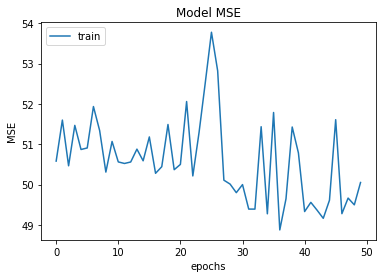

In [68]:
plt.plot(mse_total)
#plt.plot(history.history['val_loss'])
plt.title('Model MSE')
plt.xlabel('epochs')
plt.ylabel('MSE')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [65]:
#Calculating mean and standard deviation of MSE - Part A
mean = np.mean(mse_total)
std_dev=np.std(mse_total)

print('The mean MSE value is {} and standard deviation for MSE is {}'.format(mean, std_dev))

The mean MSE value is 50.59490996401415 and standard deviation for MSE is 1.0276902495212634
